In [1]:
%config InlineBackend.figure_format = "retina" # High-res graphs (rendered irrelevant by svg option below)
%config InlineBackend.print_figure_kwargs = {"bbox_inches": "tight"} # No extra white space
%config InlineBackend.figure_format = "svg" # 'png' is default

from IPython.core.debugger import set_trace
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# AIC/BIC

## Load data

In [22]:
aic = np.load("AIC.npy")
bic = np.load("BIC.npy")
num_subjects, num_models = aic.shape
best_model = 2 # 0-indexing

## Transform into dataframe for seaborn

In [14]:
columns = ["subject", "metric", "model", "amount"]
index = []
data = pd.DataFrame(index=index, columns=columns)

metric_dict = {
    "aic": aic,
    "bic": bic
}

for metric, vals in metric_dict.items():
    for subject, row in enumerate(vals):        
        for model, amount in enumerate(row):
            model = f"model_{model}"
            data_row = [subject, metric, model, amount]
            data = data.append(pd.DataFrame([data_row],index=['e'],columns=data.columns))

data.head()

,subject,metric,model,amount
646,39,bic,model_6,7757.436294
647,39,bic,model_7,7785.233642
648,40,bic,model_0,6994.622877
649,40,bic,model_1,7001.332181
650,40,bic,model_2,6621.318950
651,40,bic,model_3,6696.769072
652,40,bic,model_4,6591.471633
653,40,bic,model_5,6591.471633
654,40,bic,model_6,7133.687056
655,40,bic,model_7,5380.602605


# Subtract average of best model from all vals

In [28]:
zero_centered_data = data.copy()
best_model_data = data[data["model"] == "model_2"]
frames = []
for metric, _ in metric_dict.items():
    best_model_metric_data = best_model_data[best_model_data["metric"] == metric]
    average_to_subtract = best_model_metric_data["amount"].mean()
    metric_data = zero_centered_data[zero_centered_data["metric"] == metric].copy()
    metric_data["zero_centered_amount"] = metric_data["amount"] - average_to_subtract
    frames.append(metric_data)

zero_centered_data = pd.concat(frames)
zero_centered_data.head()

,subject,metric,model,amount,zero_centered_amount
0,0,aic,model_0,4036.520533,-1988.017518
1,0,aic,model_1,4038.520537,-1986.017515
2,0,aic,model_2,3974.812511,-2049.725540
3,0,aic,model_3,3977.004510,-2047.533541
4,0,aic,model_4,3979.004062,-2045.533989


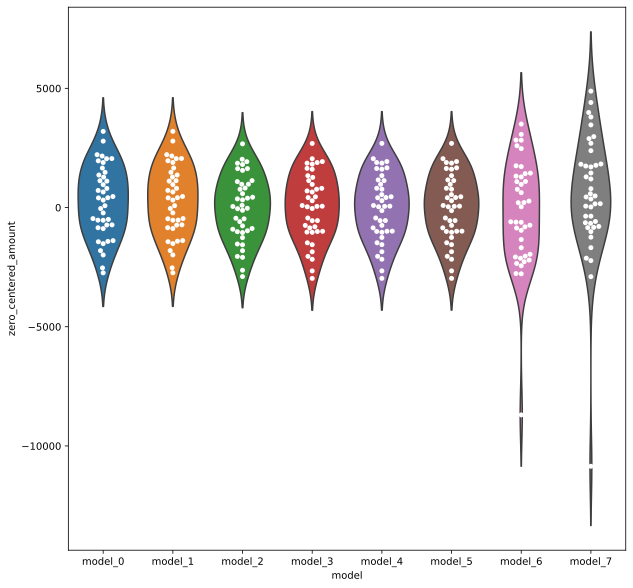

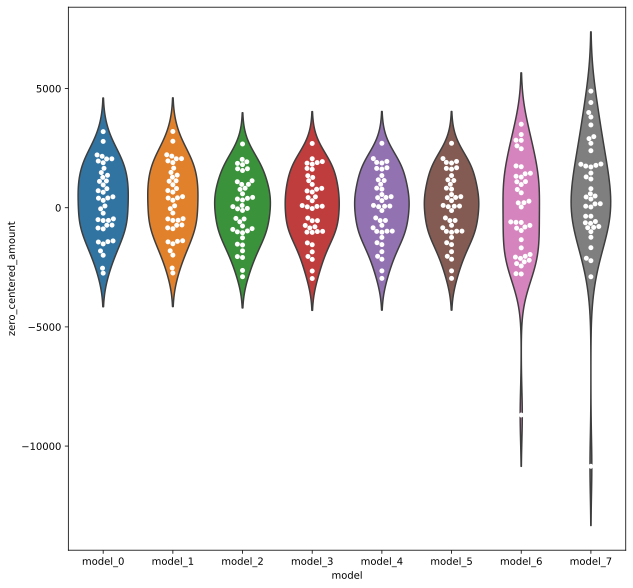

In [35]:
for metric, vals in metric_dict.items():
    these_data = zero_centered_data[zero_centered_data["metric"] == metric]
    plt.figure(figsize=(10, 10))
    ax = sns.violinplot(
        x="model", y="zero_centered_amount", data=these_data, inner=None
    )
    ax = sns.swarmplot(
        x="model",
        y="zero_centered_amount",
        data=these_data,
        color="white",
        edgecolor="gray",
    )
    plt.savefig(f"{metric}_beeswarm_violin.svg")
    plt.show()